In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Linear Regression

Let's see which features have a significant correlation, thus could be used for a linear prediction model.

In [3]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


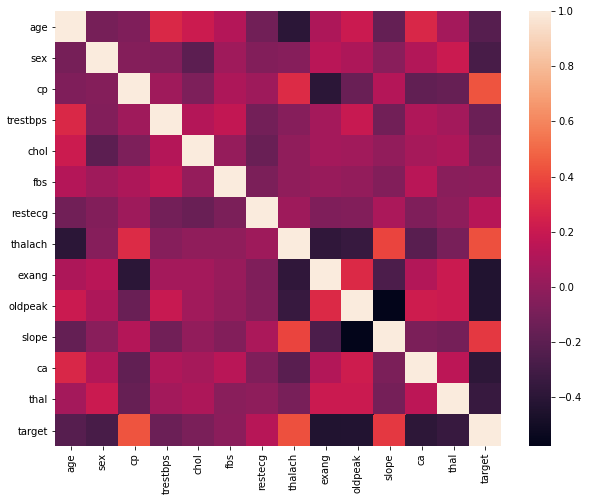

In [4]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()


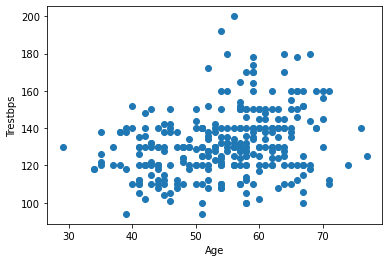

In [5]:
plt.scatter(df.age, df.trestbps)
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.show()

R-square:  0.07803692899661385
R-square:  0.07803692899661385


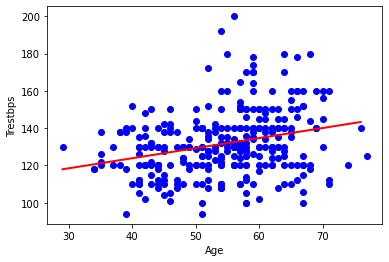

In [6]:
x=df.age.to_numpy().reshape(-1,1)
y=df.trestbps.to_numpy().reshape(-1,1)

lin_reg=LinearRegression()
lin_reg.fit(x,y)

#predict space
predict_space=np.arange(min(x), max(x)).reshape(-1,1)
predicted=lin_reg.predict(predict_space)

#R-square
print('R-square: ', lin_reg.score(x,y))

#R-square
y_head=lin_reg.predict(x)
from sklearn.metrics import r2_score
print('R-square: ', r2_score(y, y_head))

#draw
plt.scatter(x, y, color='b')
plt.plot(predict_space, predicted, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.show()

# Multiple Linear Regression

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's see if I can predict thalach via age and chol.

R-square:  0.16474777275703334


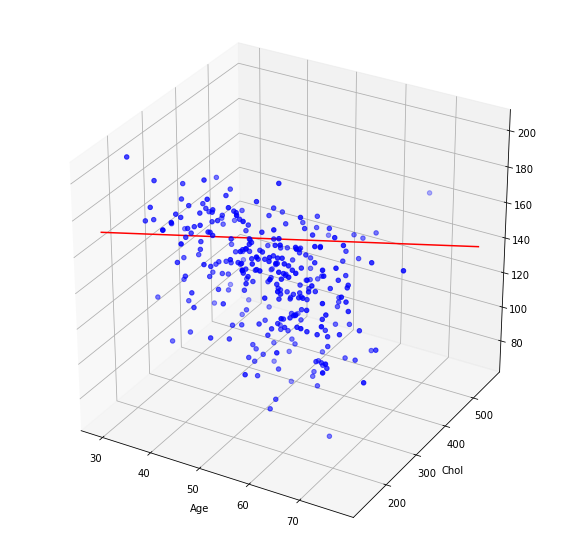

In [8]:
x=df.age.to_numpy().reshape(-1,1)
y=df.chol.to_numpy().reshape(-1,1)
z=df.thalach.to_numpy().reshape(-1,1)

lin_reg=LinearRegression()
lin_reg.fit(np.concatenate((x,y), axis=1), z)

#predict space
x_ = np.linspace(min(x), max(x), len(x))
y_ = np.linspace(min(y), max(y), len(y))
z_head=lin_reg.predict(np.concatenate((x_,y_), axis=1))
z_head=np.array([i[0] for i in z_head])

#R-square
print('R-square: ',lin_reg.score(np.concatenate((x,y), axis=1), z))

#draw the line
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z,color='b')
ax.plot(x_, y_, z_head, color='r')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.show()



# Decision Tree Regression

I will use 'age' to predict 'chol' by using a decision tree regression.

R-square:  0.13656711945817201


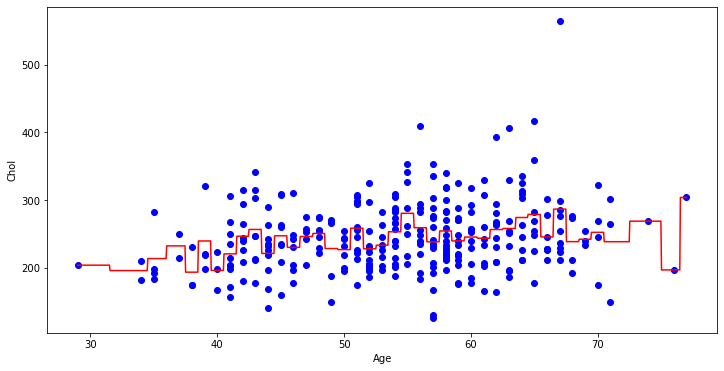

In [9]:
from sklearn.tree import DecisionTreeRegressor

x=df.age.to_numpy().reshape(-1,1)
y=df.chol.to_numpy().reshape(-1,1)

dec_tree=DecisionTreeRegressor()
dec_tree.fit(x,y)

x_=np.linspace(min(x), max(x), 1000).reshape(-1,1)
y_=dec_tree.predict(x_) 

print('R-square: ',dec_tree.score(x,y))

plt.figure(figsize=(12,6))
plt.scatter(x,y, color='b')
plt.plot(x_,y_,color='r')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.show()

# Random Forest Regression

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


R-square:  0.13242198129562355


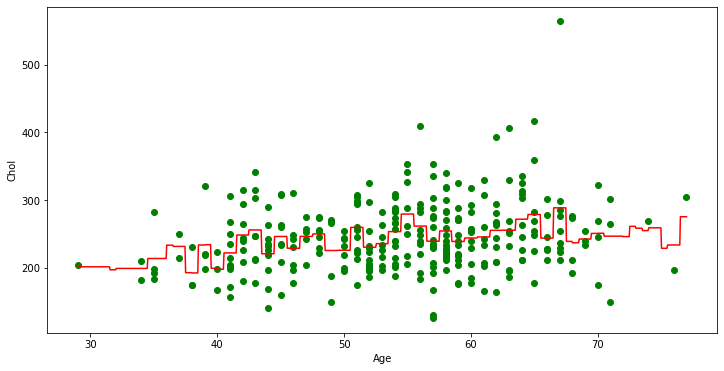

In [10]:
from sklearn.ensemble import RandomForestRegressor

x=df.age.to_numpy().reshape(-1,1)
y=df.chol.to_numpy().reshape(-1,1)

random_forest=RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(x,y)

#predict space
x_=np.linspace(min(x), max(x), 1000).reshape(-1,1)
y_=random_forest.predict(x_)

#R-square
print('R-square: ', random_forest.score(x,y))

#draw
plt.figure(figsize=(12,6))
plt.scatter(x,y,color='g')
plt.plot(x_, y_, color='r')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.show()